# Key Levels Detection (Low - High)

In [86]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
from ps_candlestick import get_type_candlestick
from ps_candlestick import has_reversal_pattern

In [87]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-06-27 14:15:00,1287.0,1290.3,1287.0,1290.3,8742
2024-06-27 14:20:00,1290.3,1291.7,1289.0,1289.4,10668
2024-06-27 14:25:00,1289.6,1290.7,1288.5,1289.8,6239


In [88]:
data = dataset.copy()
data['max_5bars_prev'] = data['High'].rolling(5).max()
data['max_5bars_next'] = data['High'].shift(-4).rolling(5).max()
data['min_5bars_prev'] = data['Low'].rolling(5).min()
data['min_5bars_next'] = data['Low'].shift(-4).rolling(5).min()
data

,Open,High,Low,Close,Volume,max_5bars_prev,max_5bars_next,min_5bars_prev,min_5bars_next
Date,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,NaN,NaN,NaN,NaN
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,NaN,NaN,NaN,NaN
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,NaN,NaN,NaN,NaN
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,NaN,NaN,NaN,NaN
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,943.7,945.9,942.3,942.4
...,...,...,...,...,...,...,...,...,...
2024-06-27 14:15:00,1287.0,1290.3,1287.0,1290.3,8742,1290.3,1291.7,1285.3,1287.0
2024-06-27 14:20:00,1290.3,1291.7,1289.0,1289.4,10668,1291.7,NaN,1286.5,NaN
2024-06-27 14:25:00,1289.6,1290.7,1288.5,1289.8,6239,1291.7,NaN,1286.5,NaN


In [89]:
data['is_r_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_5bars_prev'] and r['High'] == r['max_5bars_next']) else False, axis=1)
data['is_s_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_5bars_prev'] and r['Low'] == r['min_5bars_next']) else False, axis=1)
data

,Open,High,Low,Close,Volume,max_5bars_prev,max_5bars_next,min_5bars_prev,min_5bars_next,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,943.7,945.9,942.3,942.4,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 14:15:00,1287.0,1290.3,1287.0,1290.3,8742,1290.3,1291.7,1285.3,1287.0,False,False
2024-06-27 14:20:00,1290.3,1291.7,1289.0,1289.4,10668,1291.7,NaN,1286.5,NaN,False,False
2024-06-27 14:25:00,1289.6,1290.7,1288.5,1289.8,6239,1291.7,NaN,1286.5,NaN,False,False


In [90]:
data[data['is_r_keylevel'] == True][['is_r_keylevel', 'High']].tail(10)

,is_r_keylevel,High
Date,,
2024-06-25 13:30:00,True,1293.5
2024-06-25 14:05:00,True,1292.0
2024-06-26 09:15:00,True,1291.0
2024-06-26 09:45:00,True,1291.8
2024-06-26 13:00:00,True,1282.9
2024-06-26 13:25:00,True,1283.7
2024-06-26 14:25:00,True,1290.4
2024-06-27 10:10:00,True,1286.2
2024-06-27 11:05:00,True,1284.5


In [91]:
data[data['is_s_keylevel'] == True]

,Open,High,Low,Close,Volume,max_5bars_prev,max_5bars_next,min_5bars_prev,min_5bars_next,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,
2018-08-13 10:50:00,943.6,943.8,942.3,943.2,1541,945.0,946.1,942.3,942.3,False,True
2018-08-13 13:25:00,947.7,947.7,946.7,947.0,2614,948.9,949.6,946.7,946.7,False,True
2018-08-14 09:55:00,955.7,955.8,954.7,955.8,1187,957.0,957.3,954.7,954.7,False,True
2018-08-14 11:10:00,952.9,953.3,952.1,952.3,1416,954.4,955.0,952.1,952.1,False,True
2018-08-14 13:05:00,953.5,953.8,952.5,953.8,1128,955.0,956.9,952.5,952.5,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 14:20:00,1281.3,1286.8,1280.7,1286.8,11085,1287.5,1290.4,1280.7,1280.7,False,True
2024-06-27 09:30:00,1284.4,1284.4,1282.2,1282.8,5752,1286.4,1284.4,1282.2,1282.2,False,True
2024-06-27 10:00:00,1282.8,1284.0,1282.5,1283.9,2975,1284.3,1286.2,1282.5,1282.5,False,True


In [92]:
has_keylevel = data[(data['is_r_keylevel'] == True) | (data['is_s_keylevel'] == True)]
has_keylevel['count'] = '1'
has_keylevel['keylevels'] = has_keylevel.apply(lambda r: r['High'] if r['is_r_keylevel'] == True else r['Low'], axis=1)
has_keylevel

,Open,High,Low,Close,Volume,max_5bars_prev,max_5bars_next,min_5bars_prev,min_5bars_next,is_r_keylevel,is_s_keylevel,count,keylevels
Date,,,,,,,,,,,,,
2018-08-13 09:25:00,943.8,945.9,943.7,945.3,2469,945.9,945.9,942.3,943.3,True,False,1,945.9
2018-08-13 09:55:00,946.2,946.4,945.6,946.0,1873,946.4,946.4,943.3,944.5,True,False,1,946.4
2018-08-13 10:50:00,943.6,943.8,942.3,943.2,1541,945.0,946.1,942.3,942.3,False,True,1,942.3
2018-08-13 13:15:00,948.5,948.9,947.8,948.2,1455,948.9,948.9,947.1,946.7,True,False,1,948.9
2018-08-13 13:25:00,947.7,947.7,946.7,947.0,2614,948.9,949.6,946.7,946.7,False,True,1,946.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 10:10:00,1284.7,1286.2,1284.6,1285.8,5560,1286.2,1286.2,1282.5,1283.1,True,False,1,1286.2
2024-06-27 11:00:00,1281.4,1282.8,1280.8,1282.5,4121,1284.4,1284.5,1280.8,1280.8,False,True,1,1280.8
2024-06-27 11:05:00,1282.5,1284.5,1282.4,1283.8,4313,1284.5,1284.5,1280.8,1282.1,True,False,1,1284.5


In [93]:
has_keylevel[(has_keylevel.index > '2024-06-26 00:00:00') & (has_keylevel.index < '2024-06-26 15:00:00')]

,Open,High,Low,Close,Volume,max_5bars_prev,max_5bars_next,min_5bars_prev,min_5bars_next,is_r_keylevel,is_s_keylevel,count,keylevels
Date,,,,,,,,,,,,,
2024-06-26 09:15:00,1289.0,1291.0,1289.0,1290.6,4645,1291.0,1291.0,1287.4,1289.0,True,False,1,1291.0
2024-06-26 09:45:00,1291.4,1291.8,1290.6,1290.7,3322,1291.8,1291.8,1289.3,1288.0,True,False,1,1291.8
2024-06-26 11:20:00,1276.0,1279.0,1275.0,1279.0,7784,1283.0,1282.9,1275.0,1275.0,False,True,1,1275.0
2024-06-26 13:00:00,1280.7,1282.9,1280.5,1282.8,6532,1282.9,1282.9,1275.0,1279.8,True,False,1,1282.9
2024-06-26 13:15:00,1281.1,1281.2,1279.8,1280.7,4299,1282.9,1283.7,1279.8,1279.8,False,True,1,1279.8
2024-06-26 13:25:00,1281.9,1283.7,1281.5,1282.7,6264,1283.7,1283.7,1279.8,1280.8,True,False,1,1283.7
2024-06-26 14:20:00,1281.3,1286.8,1280.7,1286.8,11085,1287.5,1290.4,1280.7,1280.7,False,True,1,1280.7
2024-06-26 14:25:00,1287.0,1290.4,1287.0,1289.5,13988,1290.4,1290.4,1280.7,1284.0,True,False,1,1290.4


In [94]:
def cal_keylevels(tick):
    if tick.empty:
        return ''
    keylevels = []
    tick = tick.sort_values(ascending=False)
    i = 0
    while i < len(tick):
        if i == 0 or i == len(tick)-1:
            keylevels.append(tick[i])
        else:
            if tick[i-1] > tick[i] + 3 or tick[i] > tick[i+1] + 3:
                keylevels.append(tick[i])
        i = i+1
    return ", ".join(map(str, keylevels))

has_keylevel_day = has_keylevel.resample("D").agg({
        'count': 'count',
        'keylevels': cal_keylevels
        #'keylevels': lambda x: ", ".join(map(str, x))
    })
has_keylevel_day = has_keylevel_day[has_keylevel_day['count'] != 0]

In [95]:
has_keylevel_day[['keylevels']]

,keylevels
Date,
2018-08-13,"948.9, 945.9, 942.3"
2018-08-14,"961.8, 957.3, 952.1"
2018-08-15,"962.3, 954.7"
2018-08-16,"947.3, 943.5, 935.5"
2018-08-17,"954.6, 945.0"
...,...
2024-06-21,"1323.4, 1318.7, 1315.6, 1315.5, 1312.1, 1311.7"
2024-06-24,"1317.3, 1313.0, 1299.0, 1298.1, 1294.5, 1290.4..."
2024-06-25,"1294.0, 1292.0, 1288.4, 1285.8, 1280.1"


In [96]:
has_keylevel_day[['count']]

,count
Date,
2018-08-13,5
2018-08-14,8
2018-08-15,9
2018-08-16,9
2018-08-17,7
...,...
2024-06-21,10
2024-06-24,11
2024-06-25,11


In [97]:
has_keylevel_day[['count']].min()

count    2
dtype: int64

In [98]:
has_keylevel_day['count'].max()

21

In [99]:
has_keylevel_day['keylevels'] = has_keylevel_day['keylevels'].shift(1)
join_data = has_keylevel_day[['keylevels']]

In [100]:
data2 = dataset.copy()
data2['cs'] = data2.apply(lambda r: get_type_candlestick(r), axis=1)
data2['cs_shift_1'] = data2['cs'].shift(1)
data2['cs_shift_2'] = data2['cs'].shift(2)
data2['cs_reversal'] = data2.apply(lambda r: has_reversal_pattern(r), axis=1)
data2["ema_line"] = ta.ema(data2["Close"], length=20)
data2['above_ma'] = data2.apply(lambda r: 1 if r['Close'] > r['ema_line'] else 0, axis=1)
data2['below_ma'] = data2.apply(lambda r: 1 if r['Close'] < r['ema_line'] else 0, axis=1)
data2['total_above_ma'] = data2['above_ma'].rolling(150).sum()
data2['total_below_ma'] = data2['below_ma'].rolling(150).sum()
data2['trend'] = data2.apply(lambda r: 'switch' if r['total_above_ma'] == r['total_below_ma'] else ('up' if r['total_above_ma'] > r['total_below_ma'] else 'down'), axis=1)

In [101]:
data2 = data2.assign(time_d=pd.PeriodIndex(data2.index, freq='1D').to_timestamp())
data2 = pd.merge(data2, join_data, left_on="time_d", right_index=True, how="left")

In [102]:
data2 = data2[data2['keylevels'].notnull()]
data2

,Open,High,Low,Close,Volume,cs,cs_shift_1,cs_shift_2,cs_reversal,ema_line,above_ma,below_ma,total_above_ma,total_below_ma,trend,time_d,keylevels
Date,,,,,,,,,,,,,,,,,
2018-08-14 09:00:00,955.5,955.5,954.7,954.9,1103,white,black,black,0,950.522473,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3"
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,530,black,white,black,0,950.948904,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3"
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,509,doji,black,white,0,951.334723,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3"
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,1758,big_body_white,doji,black,1,951.864749,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3"
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,1230,white,big_body_white,doji,0,952.239535,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 14:15:00,1287.0,1290.3,1287.0,1290.3,8742,big_body_white,white,spinning_top,0,1286.241016,1,0,57.0,93.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0"
2024-06-27 14:20:00,1290.3,1291.7,1289.0,1289.4,10668,spinning_top,big_body_white,white,0,1286.541872,1,0,58.0,92.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0"
2024-06-27 14:25:00,1289.6,1290.7,1288.5,1289.8,6239,spinning_top,spinning_top,big_body_white,1,1286.852169,1,0,59.0,91.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0"


In [103]:
def cross_keylevel(row):
    cross = ''
    keylevels = str(row['keylevels']).split(", ")
    current_price = row['Close']
    for keylevel in keylevels:
        if row['High'] > float(keylevel) > row['Low']:
            cross = 'cross'
    return cross
data2['cross'] = data2.apply(lambda r: cross_keylevel(r), axis=1)

In [104]:
data2

,Open,High,Low,Close,Volume,cs,cs_shift_1,cs_shift_2,cs_reversal,ema_line,above_ma,below_ma,total_above_ma,total_below_ma,trend,time_d,keylevels,cross
Date,,,,,,,,,,,,,,,,,,
2018-08-14 09:00:00,955.5,955.5,954.7,954.9,1103,white,black,black,0,950.522473,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3",
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,530,black,white,black,0,950.948904,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3",
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,509,doji,black,white,0,951.334723,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3",
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,1758,big_body_white,doji,black,1,951.864749,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3",
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,1230,white,big_body_white,doji,0,952.239535,1,0,NaN,NaN,down,2018-08-14,"948.9, 945.9, 942.3",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 14:15:00,1287.0,1290.3,1287.0,1290.3,8742,big_body_white,white,spinning_top,0,1286.241016,1,0,57.0,93.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",
2024-06-27 14:20:00,1290.3,1291.7,1289.0,1289.4,10668,spinning_top,big_body_white,white,0,1286.541872,1,0,58.0,92.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross
2024-06-27 14:25:00,1289.6,1290.7,1288.5,1289.8,6239,spinning_top,spinning_top,big_body_white,1,1286.852169,1,0,59.0,91.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross


In [105]:
def cal_signal(row):
    signal = ''
    if row['trend'] == 'down':
        keylevels = str(row['keylevels']).split(", ")
        keylevels = [float(i) for i in keylevels]
        max_keylevel = keylevels[0]
        if row['Open'] > row['Close'] and row['High'] > max_keylevel > row['Close']:
            signal = 'short'
        current_price = row['Close']
        for keylevel in keylevels:
            if row['Open'] > row['Close'] and row['High'] > float(keylevel) > row['Close']:
                # Cross key_level and black candlestick
                if row['cs_reversal'] == 1:
                    signal = 'short'
    elif row['trend'] == 'up':
        signal = ''
        # keylevels = str(row['keylevels']).split(", ")
        # current_price = row['Close']
        # for keylevel in keylevels:
        #     if row['Open'] < row['Close'] and row['Low'] < float(keylevel) < row['Close']:
        #         signal = 'long'
    return signal
data2['signal'] = data2.apply(lambda r: cal_signal(r), axis=1)

In [106]:
selected_day = data2[(data2.index > '2024-06-07 00:00:00') & (data2.index < '2024-06-07 15:00:00')]
selected_day[selected_day['cross'] == 'cross']

,Open,High,Low,Close,Volume,cs,cs_shift_1,cs_shift_2,cs_reversal,ema_line,above_ma,below_ma,total_above_ma,total_below_ma,trend,time_d,keylevels,cross,signal
Date,,,,,,,,,,,,,,,,,,,
2024-06-07 09:00:00,1306.3,1307.7,1305.5,1305.6,10120,spinning_top,doji,doji,1,1300.093376,1,0,77.0,73.0,up,2024-06-07,"1306.2, 1298.5, 1292.1",cross,
2024-06-07 09:05:00,1305.7,1306.6,1305.0,1305.3,3336,spinning_top,spinning_top,doji,1,1300.589245,1,0,77.0,73.0,up,2024-06-07,"1306.2, 1298.5, 1292.1",cross,
2024-06-07 09:10:00,1305.3,1307.2,1305.2,1307.1,3973,big_body_white,spinning_top,spinning_top,1,1301.209317,1,0,78.0,72.0,up,2024-06-07,"1306.2, 1298.5, 1292.1",cross,
2024-06-07 09:25:00,1306.9,1307.0,1306.1,1306.7,2768,white,white,black,0,1302.711381,1,0,79.0,71.0,up,2024-06-07,"1306.2, 1298.5, 1292.1",cross,
2024-06-07 09:40:00,1307.0,1307.0,1303.5,1303.8,5282,big_body_black,black,black,0,1303.543156,1,0,79.0,71.0,up,2024-06-07,"1306.2, 1298.5, 1292.1",cross,
2024-06-07 14:05:00,1301.5,1301.9,1298.3,1299.1,13004,white,white,black,0,1302.473539,0,1,75.0,75.0,switch,2024-06-07,"1306.2, 1298.5, 1292.1",cross,
2024-06-07 14:10:00,1299.2,1302.0,1298.2,1299.5,8488,spinning_top,white,white,0,1302.190345,0,1,75.0,75.0,switch,2024-06-07,"1306.2, 1298.5, 1292.1",cross,
2024-06-07 14:25:00,1302.9,1309.4,1302.8,1309.4,14343,big_body_white,black,spinning_top,0,1302.771880,1,0,76.0,74.0,up,2024-06-07,"1306.2, 1298.5, 1292.1",cross,


In [107]:
selected_day.iloc[-1]['keylevels']

'1306.2, 1298.5, 1292.1'

In [108]:
data2[data2['signal'] == 'short']

,Open,High,Low,Close,Volume,cs,cs_shift_1,cs_shift_2,cs_reversal,ema_line,above_ma,below_ma,total_above_ma,total_below_ma,trend,time_d,keylevels,cross,signal
Date,,,,,,,,,,,,,,,,,,,
2018-08-15 10:40:00,961.9,962.0,960.8,960.8,1237,white,spinning_top,black,1,960.423724,1,0,NaN,NaN,down,2018-08-15,"961.8, 957.3, 952.1",cross,short
2018-08-17 13:55:00,947.5,947.5,945.8,946.5,2820,white,white,big_body_black,0,950.717122,0,1,70.0,80.0,down,2018-08-17,"947.3, 943.5, 935.5",cross,short
2018-08-17 14:10:00,948.9,948.9,946.1,946.8,2228,white,black,black,0,949.937495,0,1,67.0,83.0,down,2018-08-17,"947.3, 943.5, 935.5",cross,short
2018-08-17 14:25:00,948.6,949.4,945.0,947.0,4011,white,doji,doji,1,949.324963,0,1,64.0,86.0,down,2018-08-17,"947.3, 943.5, 935.5",cross,short
2018-08-31 14:25:00,965.7,965.7,963.8,964.0,2711,big_body_black,spinning_top,black,1,967.888698,0,1,72.0,78.0,down,2018-08-31,"964.2, 960.6",cross,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25 10:40:00,1290.9,1290.9,1288.3,1288.7,5390,white,spinning_top,white,1,1290.602375,0,1,34.0,116.0,down,2024-06-25,"1317.3, 1313.0, 1299.0, 1298.1, 1294.5, 1290.4...",cross,short
2024-06-25 13:50:00,1290.0,1291.0,1287.6,1289.7,8865,spinning_top,spinning_top,spinning_top,1,1289.770822,0,1,36.0,114.0,down,2024-06-25,"1317.3, 1313.0, 1299.0, 1298.1, 1294.5, 1290.4...",cross,short
2024-06-26 11:10:00,1280.3,1280.5,1277.4,1277.4,10856,big_body_black,spinning_top,white,1,1284.832500,0,1,34.0,116.0,down,2024-06-26,"1294.0, 1292.0, 1288.4, 1285.8, 1280.1",cross,short


In [109]:
_trades = pd.DataFrame(columns=("EntryTime", "EntryPrice", "ExitTime", "ExitPrice", "Type", "Profit"))
has_open_deal = False
type_open_deal = ''
# Stoploss at 15 pips
sl_step = 1.5
# Takeprofit at 45 pips(R/R = 1/3)
tp_step = 4.5
for i, row in data2.iterrows():
    if 915 < 100*row.name.hour + row.name.minute < 1420:
        if has_open_deal:
            if type_open_deal == 'short':
                # Stoploss
                if row['High'] > entry_price + sl_step:
                    profit = -2
                    exit_price = entry_price + sl_step
                    exit_time = row.name
                    _trades.loc[len(_trades)] = [entry_time, entry_price, exit_time, exit_price, "Short", profit]
                    has_open_deal = False
                    type_open_deal = ''
                else:
                    # Takeprofit
                    if row['Low'] < entry_price - tp_step:
                        profit = 6
                        exit_price = entry_price - tp_step
                        exit_time = row.name
                        _trades.loc[len(_trades)] = [entry_time, entry_price, exit_time, exit_price, "Short", profit]
                        has_open_deal = False
                        type_open_deal = ''
            elif type_open_deal == 'long':
                # Stoploss
                if row['Low'] < entry_price - sl_step:
                    profit = -2
                    exit_price = entry_price - sl_step
                    exit_time = row.name
                    _trades.loc[len(_trades)] = [entry_time, entry_price, exit_time, exit_price, "Long", profit]
                    has_open_deal = False
                    type_open_deal = ''
                else:
                    # Takeprofit
                    if row['High'] > entry_price + tp_step:
                        profit = 6
                        exit_price = entry_price + tp_step
                        exit_time = row.name
                        _trades.loc[len(_trades)] = [entry_time, entry_price, exit_time, exit_price, "Long", profit]
                        has_open_deal = False
                        type_open_deal = ''
                    #
        if not has_open_deal:
            if row['signal'] == 'short':
                # Open short deal
                entry_price = row['Close']
                entry_time = row.name
                has_open_deal = True
                type_open_deal = 'short'
            elif row['signal'] == 'long':
                # Open short deal
                entry_price = row['Close']
                entry_time = row.name
                has_open_deal = True
                type_open_deal = 'long'
    else:
        if 100*row.name.hour + row.name.minute == 1425:
            if has_open_deal:
                # close open deal at 2:25PM (dataframe)
                if type_open_deal == 'short':
                    profit = entry_price - row['Close']
                    if profit < -2:
                        profit = -2
                    exit_price = row['Close']
                    exit_time = row.name
                    has_open_deal = False
                    type_open_deal = ''
                    _trades.loc[len(_trades)] = [entry_time, entry_price, exit_time, exit_price, "Short", profit]
                elif type_open_deal == 'long':
                    profit = row['Close'] - entry_price
                    if profit < -2:
                        profit = -2
                    exit_price = row['Close']
                    exit_time = row.name
                    has_open_deal = False
                    type_open_deal = ''
                    _trades.loc[len(_trades)] = [entry_time, entry_price, exit_time, exit_price, "Long", profit]

In [110]:
_trades[_trades.Type == 'Long']

,EntryTime,EntryPrice,ExitTime,ExitPrice,Type,Profit


In [111]:
_trades[_trades.Type == 'Short']

,EntryTime,EntryPrice,ExitTime,ExitPrice,Type,Profit
0,2018-08-15 10:40:00,960.8,2018-08-15 11:20:00,956.3,Short,6.0
1,2018-08-17 13:55:00,946.5,2018-08-17 14:05:00,948.0,Short,-2.0
2,2018-08-17 14:10:00,946.8,2018-08-17 14:15:00,948.3,Short,-2.0
3,2018-09-07 10:30:00,935.8,2018-09-07 11:20:00,931.3,Short,6.0
4,2018-09-11 11:25:00,944.2,2018-09-11 13:00:00,945.7,Short,-2.0
...,...,...,...,...,...,...
544,2024-06-25 10:40:00,1288.7,2024-06-25 10:50:00,1290.2,Short,-2.0
545,2024-06-25 13:50:00,1289.7,2024-06-25 14:05:00,1291.2,Short,-2.0
546,2024-06-26 11:10:00,1277.4,2024-06-26 11:20:00,1278.9,Short,-2.0
547,2024-06-26 14:10:00,1283.5,2024-06-26 14:15:00,1285.0,Short,-2.0


In [112]:
_trades.Profit.sum()

163.70000000000005

In [113]:
this_month = _trades[(_trades.EntryTime > '2024-06-01 00:00:00') & (_trades.EntryTime < '2024-06-30 15:00:00')]

In [114]:
this_month.Profit.sum()

-18.0

In [115]:
this_month

,EntryTime,EntryPrice,ExitTime,ExitPrice,Type,Profit
540,2024-06-11 13:20:00,1303.8,2024-06-11 14:25:00,1308.2,Short,-2.0
541,2024-06-21 10:35:00,1316.1,2024-06-21 10:45:00,1317.6,Short,-2.0
542,2024-06-21 13:30:00,1316.4,2024-06-21 13:35:00,1317.9,Short,-2.0
543,2024-06-25 10:00:00,1289.7,2024-06-25 10:25:00,1291.2,Short,-2.0
544,2024-06-25 10:40:00,1288.7,2024-06-25 10:50:00,1290.2,Short,-2.0
545,2024-06-25 13:50:00,1289.7,2024-06-25 14:05:00,1291.2,Short,-2.0
546,2024-06-26 11:10:00,1277.4,2024-06-26 11:20:00,1278.9,Short,-2.0
547,2024-06-26 14:10:00,1283.5,2024-06-26 14:15:00,1285.0,Short,-2.0
548,2024-06-27 09:55:00,1282.9,2024-06-27 10:05:00,1284.4,Short,-2.0


In [116]:
selected_day = data2[(data2.index > '2024-06-27 00:00:00') & (data2.index < '2024-06-27 15:00:00')]
selected_day[selected_day['cross'] == 'cross']

,Open,High,Low,Close,Volume,cs,cs_shift_1,cs_shift_2,cs_reversal,ema_line,above_ma,below_ma,total_above_ma,total_below_ma,trend,time_d,keylevels,cross,signal
Date,,,,,,,,,,,,,,,,,,,
2024-06-27 09:10:00,1284.4,1284.9,1282.7,1284.3,4146,spinning_top,spinning_top,doji,1,1284.950877,0,1,35.0,115.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,
2024-06-27 09:30:00,1284.4,1284.4,1282.2,1282.8,5752,white,white,doji,0,1284.809807,0,1,36.0,114.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,
2024-06-27 09:35:00,1282.9,1284.4,1282.9,1283.6,3440,black,white,white,0,1284.694587,0,1,36.0,114.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,
2024-06-27 09:40:00,1283.7,1283.9,1283.1,1283.2,2274,white,black,white,0,1284.552246,0,1,36.0,114.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,
2024-06-27 09:45:00,1283.2,1284.3,1282.8,1283.9,3208,black,white,black,0,1284.490127,0,1,36.0,114.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,
2024-06-27 09:50:00,1283.9,1284.2,1283.1,1284.0,1936,spinning_top,black,white,0,1284.443448,0,1,36.0,114.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,
2024-06-27 09:55:00,1283.9,1284.2,1282.8,1282.9,2812,white,spinning_top,black,1,1284.296453,0,1,36.0,114.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,short
2024-06-27 10:00:00,1282.8,1284.0,1282.5,1283.9,2975,black,white,spinning_top,0,1284.258696,0,1,36.0,114.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,
2024-06-27 10:30:00,1283.7,1284.2,1283.1,1283.4,2577,spinning_top,white,white,0,1284.390251,0,1,40.0,110.0,down,2024-06-27,"1291.8, 1290.4, 1283.7, 1279.8, 1275.0",cross,


In [117]:
day_keylevels = selected_day.iloc[0]['keylevels']
day_keylevels = str(row['keylevels']).split(", ")
day_keylevels = [float(i) for i in day_keylevels]
day_keylevels

[1291.8, 1290.4, 1283.7, 1279.8, 1275.0]

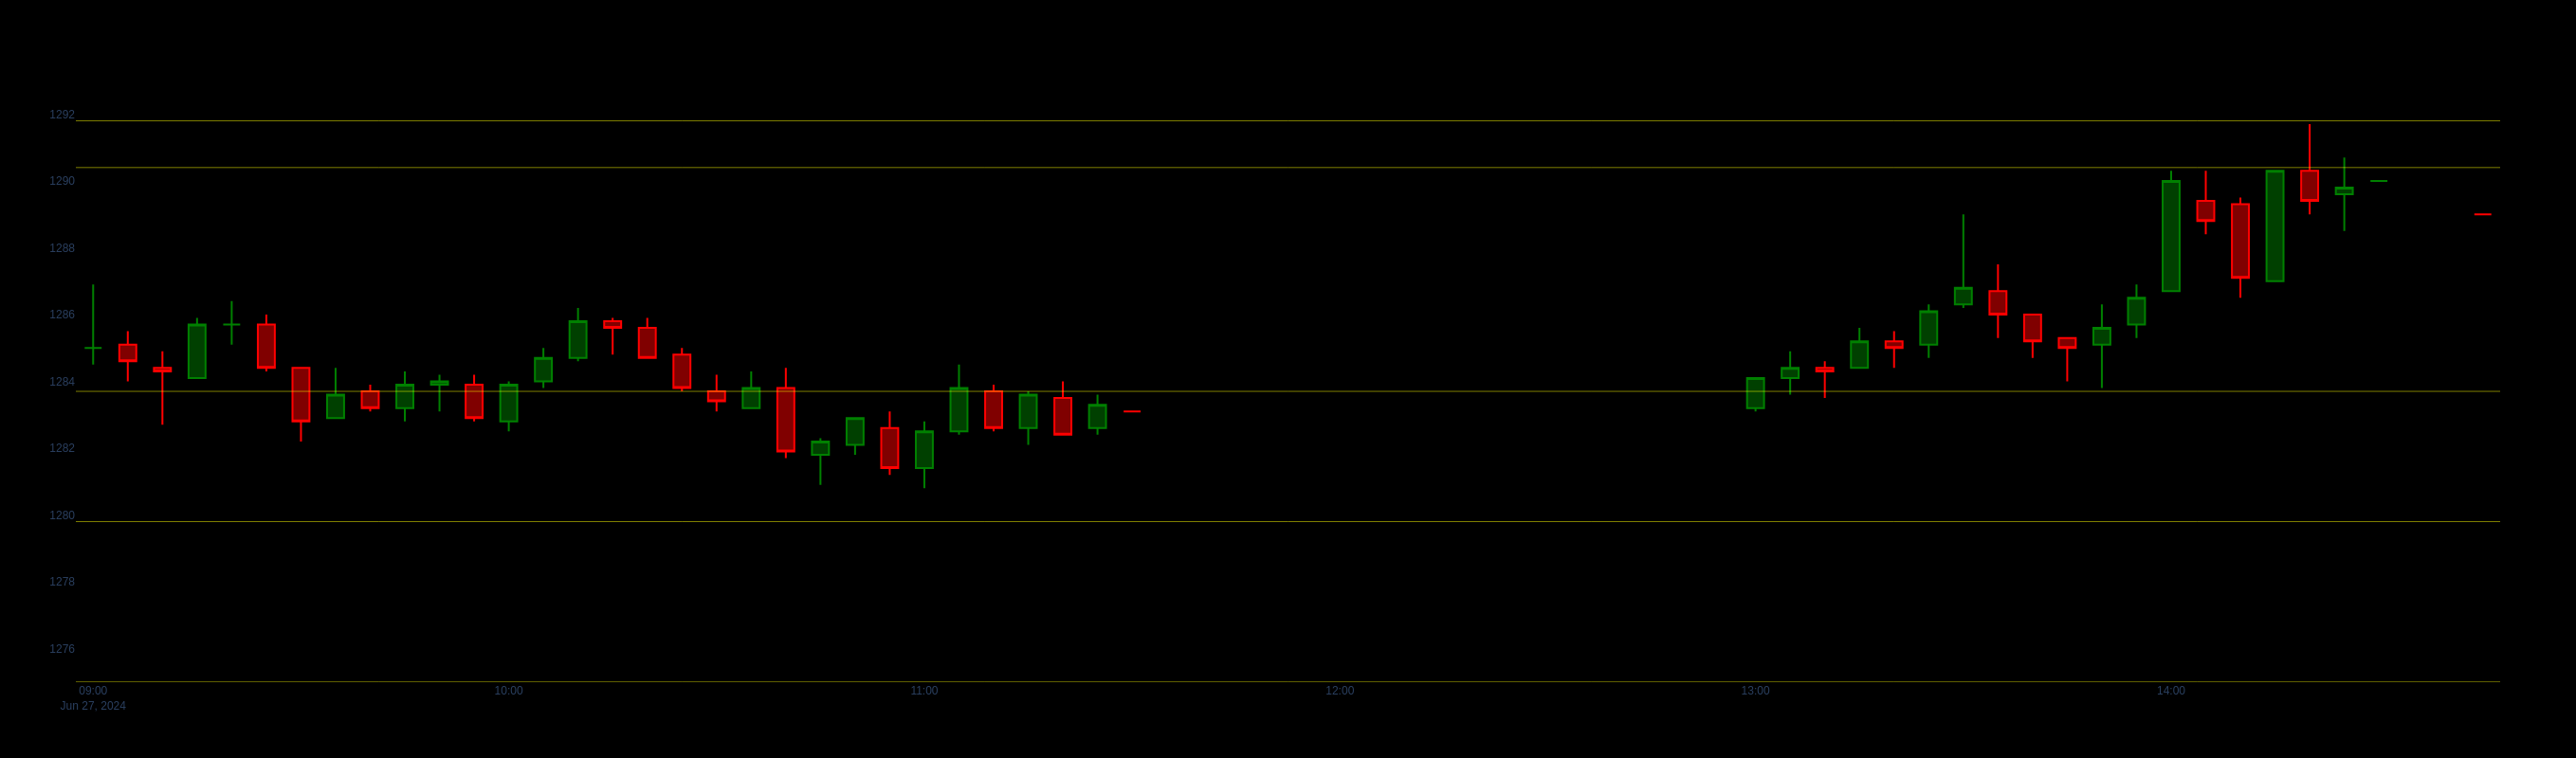

In [118]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
fig = go.Figure(data=[go.Candlestick(x=selected_day.index,
                open=selected_day['Open'],
                high=selected_day['High'],
                low=selected_day['Low'],
                close=selected_day['Close'],
                increasing_line_color= 'green', 
                decreasing_line_color= 'red')],
               layout=go.Layout(height=800))
for l in day_keylevels:
    fig.add_hline(y=l, line_width=0.5, line_color="yellow")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black')

fig.show()

In [119]:
has_keylevel[(has_keylevel.index > '2024-06-26 00:00:00') & (has_keylevel.index < '2024-06-26 15:00:00')]

,Open,High,Low,Close,Volume,max_5bars_prev,max_5bars_next,min_5bars_prev,min_5bars_next,is_r_keylevel,is_s_keylevel,count,keylevels
Date,,,,,,,,,,,,,
2024-06-26 09:15:00,1289.0,1291.0,1289.0,1290.6,4645,1291.0,1291.0,1287.4,1289.0,True,False,1,1291.0
2024-06-26 09:45:00,1291.4,1291.8,1290.6,1290.7,3322,1291.8,1291.8,1289.3,1288.0,True,False,1,1291.8
2024-06-26 11:20:00,1276.0,1279.0,1275.0,1279.0,7784,1283.0,1282.9,1275.0,1275.0,False,True,1,1275.0
2024-06-26 13:00:00,1280.7,1282.9,1280.5,1282.8,6532,1282.9,1282.9,1275.0,1279.8,True,False,1,1282.9
2024-06-26 13:15:00,1281.1,1281.2,1279.8,1280.7,4299,1282.9,1283.7,1279.8,1279.8,False,True,1,1279.8
2024-06-26 13:25:00,1281.9,1283.7,1281.5,1282.7,6264,1283.7,1283.7,1279.8,1280.8,True,False,1,1283.7
2024-06-26 14:20:00,1281.3,1286.8,1280.7,1286.8,11085,1287.5,1290.4,1280.7,1280.7,False,True,1,1280.7
2024-06-26 14:25:00,1287.0,1290.4,1287.0,1289.5,13988,1290.4,1290.4,1280.7,1284.0,True,False,1,1290.4
